In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as snd
import scipy.io as sci
import scipy
from HW4Functions import myNMF
from sklearn.decomposition import NMF

In [2]:

# Training Speech dictionary
x, sr = librosa.load("sounds.wav", sr=None) # Loading in audio file

# Calculating the spectrogram of the audio file
S = librosa.stft(x,hop_length=256,win_length=1024, window='hamming', n_fft=1024)
S_mag, S_phase = librosa.magphase(S)
S_db = librosa.amplitude_to_db(S_mag)

# NMF Parameters
r = 3
nIter = 350

[W_Speech,H,KL] = myNMF(S_mag,r,nIter)

Y_Speech = np.dot(W_Speech,H) # Reconstructed Spectrogram

In [3]:

x, sr = librosa.load("beatboxtest.wav", sr=None) # Loading in audio file

# Calculating the spectrogram of the audio file
S = librosa.stft(x,hop_length=256,win_length=1024, window='hamming', n_fft=1024)
S_mag, S_phase = librosa.magphase(S)
S_db = librosa.amplitude_to_db(S_mag)

# NMF Parameters
r = 3
nIter = 100
# [m,n] = S_mag.shape
# H = np.random.rand(r,n)
# H = H.astype('float32')
# W_Speech = W_Speech.astype('float32')

# model = NMF(n_components=r, init='custom', max_iter=500);
# W_Combo = model.fit_transform(S_mag, H=H, W=W_Speech)
# H = model.components_

[W_Combo,H,KL] = myNMF(S_mag,r,nIter,bUpdateW=0,initW=W_Speech)
# W, H = librosa.decompose.decompose(S_mag, n_components=r, sort=True, init='custom', W= W_Speech, H =H)

Text(0, 0.5, 'Frequency (Hz)')

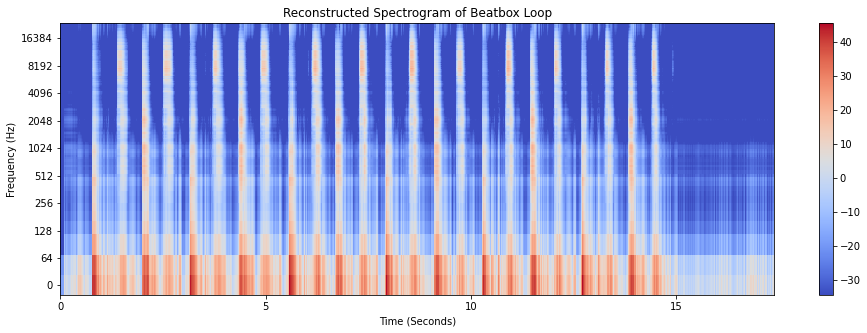

In [4]:
Y_beatbox = np.dot(W_Combo,H) # Reconstructed Spectrogram
y_beatbox = librosa.istft(Y_beatbox * S_phase, length = len(x) - 500, hop_length=256, win_length= 2048, n_fft=2048) # Inverse STFT 

plt.figure(figsize=(16, 5))
Y_db = librosa.amplitude_to_db(Y_beatbox)
librosa.display.specshow(Y_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Reconstructed Spectrogram of Beatbox Loop")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency (Hz)")



# Saving separated reconstructions

# snd.write('noise_sep.wav',y_SepNoise,sr,subtype='PCM_16')

In [5]:
for n in range(r):
    
    # Re-create the STFT of a single NMF component.
    Y = np.outer(W_Combo[:,n], H[n])*S_phase
    
    # Transform the STFT into the time domain.
    y = librosa.istft(Y)
    
    print('Component {}:'.format(n))
    display(Audio(data=y, rate=sr))

Component 0:


Component 1:


Component 2:


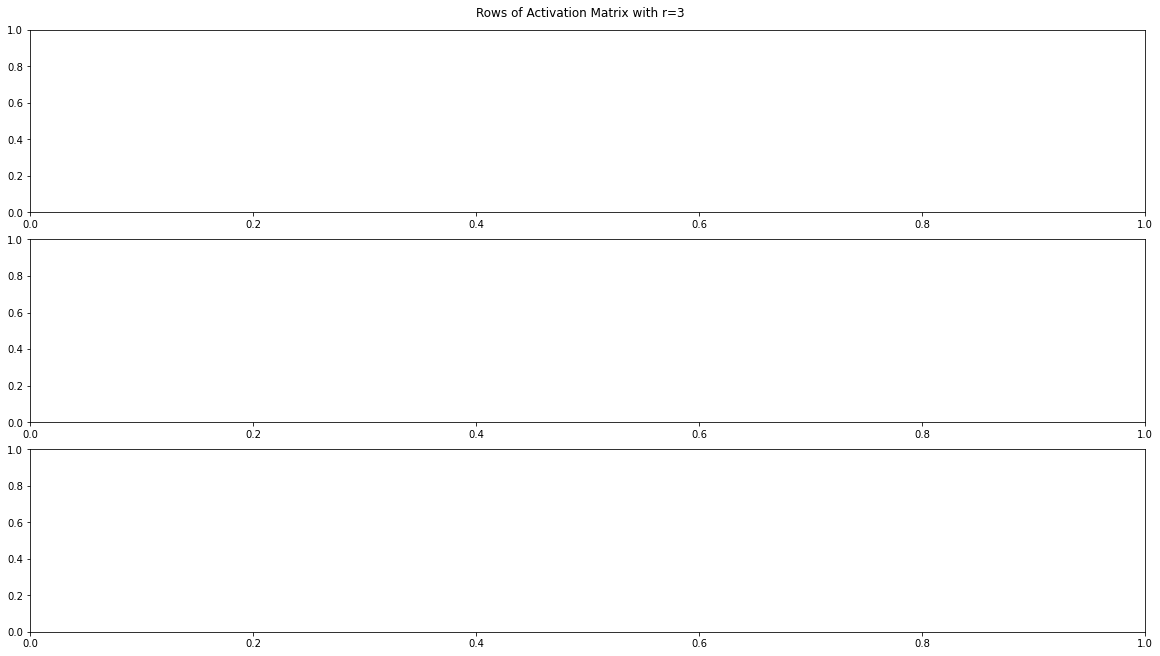

In [14]:
 # Scaling the activation matrix
# Plotting the activation matrix
fig, ax = plt.subplots(3,1,constrained_layout=True, figsize=(16,9))
fig.suptitle("Rows of Activation Matrix with r=3")
axes = ax.flat
localmax = np.zeros(100)
tempmaxima = np.zeros((3,1))
maxvals = np.zeros((3,1))
buffer = np.zeros((3,40))
counter = 0
tick = 0
for frame in range(1631):
    
    
    for n in range(r):
        # H[n,frame] *= 1.0 / (H[n,frame].max())
        buffer[n,counter] =  H[n,frame]
        # axes[n].plot(H[n,frame])
        # axes[n].plot(maxima, H[n,maxima],'x',ms=10)
        # axes[n].set_xlim(0, H.shape[1])
        # axes[n].set_title('Component %d' % n)
        # axes[n].set_xlabel('Frames')
        # axes[n].set_ylabel('Amplitude')
    counter = counter + 1
    if (counter == 40):
        counter = 0
        for n in range(r):
            buffer[n,:] *= 1.0 / buffer[n,:].max()
            tempmaxima[n,:], _ = scipy.signal.find_peaks(buffer[n], distance=40)
            maxvals[n,:] = buffer[n,int(tempmaxima[n,0])]
        localmax[tick] = np.argmax(maxvals,axis=0)
        tick = tick + 1
        
    
for n in range(r):

    H[n,:] *= 1.0 / (H[n,:].max())
    
    axes[n].plot(H[n,:])
    axes[n].plot(localmax, H[n,maxima],'x',ms=10)
    axes[n].set_xlim(0, H.shape[1])
    axes[n].set_title('Component %d' % n)
    axes[n].set_xlabel('Frames')
    axes[n].set_ylabel('Amplitude')
    numMax[n] = len(maxima)        
        


In [ ]:
buffer[2,:].shape

(40,)